In [1]:
import pycromanager
from matplotlib.pyplot import *

In [ ]:
## initialize pycromanager

In [2]:
def init_pycromanager():
    from pycromanager import Core, Studio
    core = Core()
    studio = Studio()
    core.set_timeout_ms(20000)
    return core, studio
core,studio = init_pycromanager()

In [ ]:
## read stage coordinates

In [4]:
stage_name = core.get_xy_stage_device()
xy = core.get_xy_stage_position()
z = core.get_position()
xy.x, xy.y, z

(5108, 1227, -1401.3000000000002)

In [ ]:
## check color balancing

In [13]:
import os
from collections import OrderedDict

In [10]:
root = os.getcwd()
os.chdir('./smart-wsi-scanner')
from smartpath import smartpath
os.chdir(root)

In [11]:
px,tags = smartpath.snap(core)

Capture Failed: SP doesn't recognize : tags['Core-Camera']='MicroPublisher6'


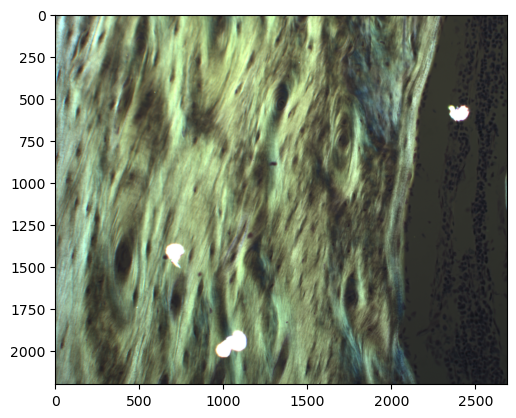

In [31]:
core.snap_image()
tagged_image = core.get_tagged_image()
tags = OrderedDict(sorted(tagged_image.tags.items()))

#if smartpath.get_device_properties(core)["Core"]["Camera"] == "QCamera":
#if smartpath.get_device_properties(core)["QCamera"]["Color"] == "ON":
pixels = np.reshape(
    tagged_image.pix,
    newshape=[tags["Height"], tags["Width"], 4],
)
imshow(pixels[:,:,:3])

In [16]:
pixels.shape

(2200, 2688, 4)

Frome Mark's Autowhite balancing for MicroPublisher camera

"MicroPublisher6-Color - Blue scale": "1.1025",
"MicroPublisher6-Color - Green scale": "1.0000",
"MicroPublisher6-Color - Red scale": "1.0394",

In [ ]:
core.set_property("MicroPublisher6","Color - Blue scale",1.1025)
core.set_property("MicroPublisher6","Color - Green scale",1.0)
core.set_property("MicroPublisher6","Color - Red scale",1.0394)
core.set_exposure(300.0) # ms

In [32]:
import yaml

In [34]:
os.getcwd()

'C:\\Users\\lociuser\\Codes\\smartpath'

In [37]:
with open('test.yml','r') as fid:
    dx = yaml.load(fid,Loader=yaml.SafeLoader)

In [39]:
import dataclasses

In [54]:
from dataclasses import make_dataclass

def read_yaml_file(filename):
    with open(filename, 'r') as file:
        data = yaml.safe_load(file)
    return data
    
def yaml_to_dataclass(yaml_data):
    # Get the keys from the YAML data to create fields for the data class
    fields = [(key, type(value)) for key, value in yaml_data.items()]
    # Create a dynamic data class
    DataClass = make_dataclass('DataClass', fields)
    # Create an instance of the dynamic data class
    instance = DataClass(**yaml_data)
    return instance

# Read YAML file
yaml_data = read_yaml_file('test.yml')

# Convert YAML data to dynamic data class instance
person = yaml_to_dataclass(yaml_data)

In [55]:
person

DataClass(rest={'url': 'https://example.org/primenumbers/v1', 'port': 8443, 'autofocus': {'members': [2, 3]}}, prime_numbers=[2, 3, 5, 7, 11, 13, 17, 19])